# Load prediction of CT1 based on Ambient Conditions
### by analysis of ambient condition, deduce the ideal load of the machine using previous data
5 year data  
convert into single df  
part data into 80:20 ratio (80% training data and 20% test data)

In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('data/Ops Monthly Returns 2017.xlsx',
                   skiprows = [0,1,3,4],            
                   #skipfooter= 48, #Number of rows to skip from bottom
                   usecols= "B:AP", #Column index in Excel format
                   sheet_name=0)
print(df.index)
df

RangeIndex(start=0, stop=365, step=1)


,Date,Site Avg. Ambient Temp.F,Site Avg. Relative Humidty %,Site Ambient Temp Max,Site Ambient Temp Min,Base load hours CT1 – Hrs,Base load hours CT1 – min,Base load hours CT2 – Hrs,Base load hours CT2 – min,Standby hours CT1 – hrs,...,Plant Capacity Factor,Plant Availability Factor,Equivalent Plant Availability,LBtu gas flow (mmscf/day),1 LBtu gas (Average Btu/scf),1 HBtu gas flow (mmscf/day),1 HBtu gas flow (mmscf/day).1,1 HBtu gas (Average Btu/scf),HBTU MMBTU,HHV Net Heat Rate (Btu/Kwh)
0,2017-01-01,57.0,0.810,68.0,51.0,24,0,24,0,0,...,0.916935,1.000000,0.954545,11.675,185.52,2165.94600,29.501,929.0,27406.429,8669.71
1,2017-01-02,55.4,0.908,59.0,51.0,21,14,22,25,0,...,0.832796,0.924941,0.846622,10.780,183.83,1981.68740,26.844,929.0,24938.076,8689.4
2,2017-01-03,59.0,0.854,62.0,56.0,24,0,24,0,0,...,0.911828,1.000000,0.960526,11.530,181.21,2089.35130,29.455,929.0,27363.695,8683.09
3,2017-01-04,60.2,0.797,62.0,58.0,24,0,24,0,0,...,0.918548,1.000000,0.948052,11.300,179.90,2032.87000,29.740,929.0,27628.460,8680.52
4,2017-01-05,59.3,0.825,62.0,57.0,24,0,24,0,0,...,0.916935,1.000000,0.948052,11.189,180.09,2015.02701,29.601,930.0,27528.930,8661.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,61.0,0.730,71.0,55.0,24,0,24,0,0,...,0.941588,1.000000,0.986056,10.856,137.02,1487.48912,29.798,971.0,28933.858,8696.78
361,2017-12-28,60.8,0.700,72.0,53.0,24,0,24,0,0,...,0.939166,1.000000,0.990438,10.900,136.45,1487.30500,29.671,976.0,28958.896,8726.34
362,2017-12-29,59.3,0.620,77.0,48.0,24,0,24,0,0,...,0.953676,1.000000,1,10.910,137.58,1500.99780,30.358,966.0,29325.828,8705.68
363,2017-12-30,58.7,0.581,77.0,47.0,24,0,24,0,0,...,0.951804,1.000000,1,10.905,138.98,1515.57690,30.399,962.0,29243.838,8701.39


In [2]:
print("Min: ",np.min(df[df.columns[4]]))

print("Max: ", np.max(df.iloc[:,4]))

print("Avg: ",np.average(df.iloc[:,4]))

Min:  33.0
Max:  92.0
Avg:  69.76438356164384


<AxesSubplot:>

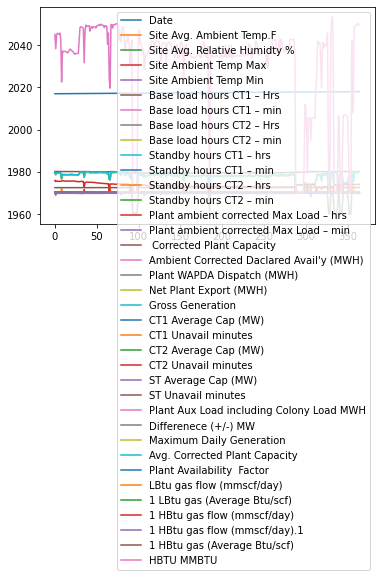

In [3]:
df.plot()